In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector) :
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

In [3]:
register(
    id ='FrozenLake-v3' , 
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4' , 'is_slippery' : False}
)
env = gym.make('FrozenLake-v3') 

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = .99
num_episodes = 2000

In [10]:

rList = []

for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    e = 1./ ((i// 100) +1 )  #decaying E- greedy
    while not done :
        
        #Explorit : 현재의 값을 이용 / Exploration : 모험 새로운 길을 가봄
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else : 
            action = np.argmax(Q[state,:])
        #action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i+1))  
        new_state , reward , done , _ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])  # discounted reward
        
        rAll += reward
        state = new_state
    rList.append(rAll)    

Succes rate : 0.8095
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


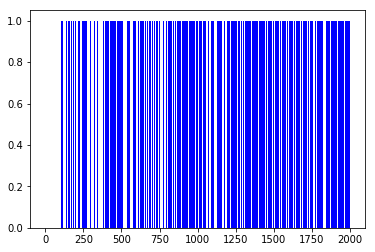

In [11]:
print("Succes rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList , color = 'blue')
plt.show()